# Newton Carlo
- Následující simulace nám pomůže zjistit pravděpodobnost pádu jablka na člověka sedícího pod stromem

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def in_rect(rect, point):
    x, y = point
    x1, y1, x2, y2 = rect
    if (x1 < x and x < x2):
        if (y1 < y and y < y2):
            return True

def simulate(size_tree, size_human, n=10):
    assert size_tree > size_human
    
    # human pos
    pos = np.random.random() * (size_tree-size_human)
    #                                         chest size
    rect_human = (pos, pos, pos+size_human, pos+(size_human/2))
    
    trials = n
    hits = 0
    
    for n in range(n):
        # fallen apple pos
        x = np.random.random() * size_tree
        y = np.random.random() * size_tree

        if in_rect(rect_human, (x, y)):
            hits += 1
    return hits

Vyzkoušejme simulaci pro člověka s šířkou ramen 0.4m sedícího pod stromem o rozloze 25m².

In [3]:
N = 1_000_000
hits = simulate(5, 0.4, n=N)
print("Pravděpodobnost: %.3f%%" % (hits/N*100))

Pravděpodobnost: 0.325%


Vyzkoušejme jak moc ovlivňuje šířka hrudníku (velikost člověka) pravděpodobnost.

In [4]:
sizes = np.linspace(0.25, 0.5, 10)
N = 1_000_000

probs = []
for size in sizes:
    hits = simulate(5, size, n=N)
    prob = hits/N*100
    probs.append(prob)

In [5]:
for s, p in zip(sizes, probs):
    print("Šířka ramen: %.2fm Pravděpodobnost: %.3f%%" % (s, p))

Šířka ramen: 0.25m Pravděpodobnost: 0.124%
Šířka ramen: 0.28m Pravděpodobnost: 0.159%
Šířka ramen: 0.31m Pravděpodobnost: 0.192%
Šířka ramen: 0.33m Pravděpodobnost: 0.223%
Šířka ramen: 0.36m Pravděpodobnost: 0.260%
Šířka ramen: 0.39m Pravděpodobnost: 0.303%
Šířka ramen: 0.42m Pravděpodobnost: 0.338%
Šířka ramen: 0.44m Pravděpodobnost: 0.390%
Šířka ramen: 0.47m Pravděpodobnost: 0.457%
Šířka ramen: 0.50m Pravděpodobnost: 0.518%


Rozdíl pravděpodobností mezi nejmenším a největším člověkem.

In [6]:
ratio = probs[-1]/probs[0]
absolute = probs[-1]-probs[0]
relative = ratio*100
print("Absolutní: %.3f%% Relativní: %.3f%% Poměr: %.2fx " % (absolute, relative, ratio))

Absolutní: 0.394% Relativní: 417.918% Poměr: 4.18x 


Z grafu můžeme soudit, že pravděpodobnost roste lineárně.

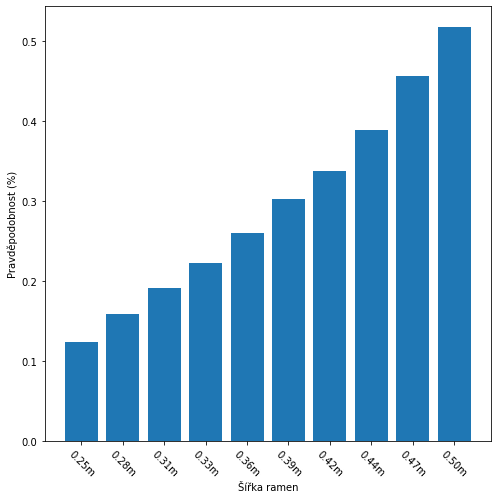

In [7]:
plt.figure(figsize=(8, 8))

plt.xticks(range(len(probs)), ["%.2fm" % s for s in sizes], rotation=-45)
plt.xlabel("Šířka ramen")
plt.ylabel("Pravděpodobnost (%)")

plt.bar(range(len(probs)), probs);

Vyzkoušejme, zda opravdu roste lineárně (i pro nereálně velké osoby).

In [8]:
sizes = np.linspace(0.25, 3, 30)
N = 1_000_000

probs = []
for size in sizes:
    hits = simulate(5, size, n=N)
    prob = hits/N*100
    probs.append(prob)

Vypadá to, že pravděpodobnost neroste lineárně, jak se na první pohled zdálo, ale exponenciálně.

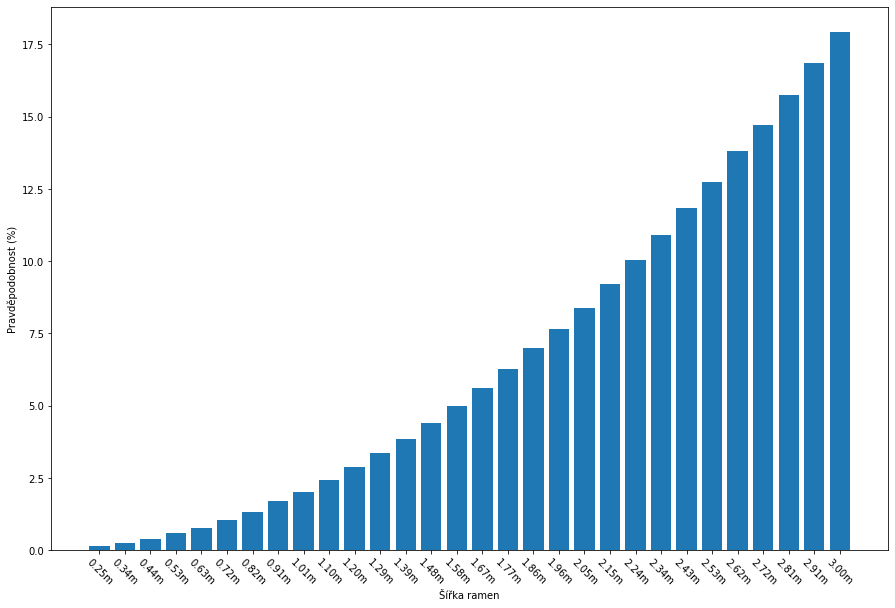

In [9]:
plt.figure(figsize=(15, 10))

plt.xticks(range(len(probs)), ["%.2fm" % s for s in sizes], rotation=-45)
plt.xlabel("Šířka ramen")
plt.ylabel("Pravděpodobnost (%)")

plt.bar(range(len(probs)), probs);